In [1]:
# Nhập thư viện

import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [2]:
# Nhập dữ liệu

df = pd.read_csv('FoodPrice_in_Turkey.csv')

In [4]:
# xem 5 dòng đầu
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [7]:
# xem 5 dòng cuối
df.tail()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985
7380,Izmir,502,Cocoa (powder) - Retail,5,KG,12,2019,51.6071


In [8]:
# xem 5 dòng ngẫu nhiên
df.sample(5)

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
5490,Istanbul,433,Meat (veal) - Retail,5,KG,5,2018,45.6659
5385,Istanbul,401,Fish (fresh) - Retail,5,KG,1,2017,23.4636
6295,Izmir,151,Coffee - Retail,5,KG,6,2019,50.8249
1719,National Average,281,Tea - Retail,5,KG,4,2015,19.4200
287,National Average,92,Eggs - Retail,33,Unit,2,2018,0.4786


In [4]:
# xem có bao nhiêu dòng, bao nhiêu cột

df.shape

(7381, 8)

In [9]:
# xem thông tin dạng từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [12]:
# xem tổng quát thống kê mô tả
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


# Xử lý dữ liệu khuyết thiếu

In [5]:
# Kiểm tra giá trị khuyết thiếu

df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [6]:
# chứng tỏ DL không bị NA --> không xử lý NA
# thông tin có thể xem ở phần df.info

# Xử lý DL ngoại lai
Phát hiện ngoại lai: vd cột price


<Axes: ylabel='Price'>

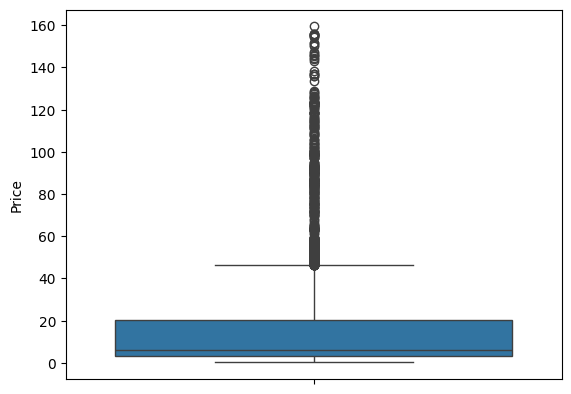

In [7]:
# Vẽ biểu đồ hộp
sns.boxplot(df['Price'])

<Axes: >

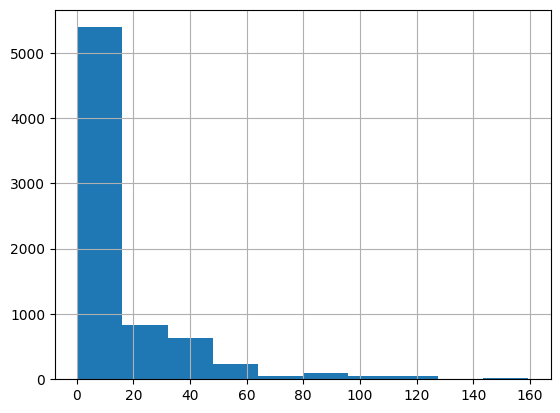

In [9]:
# Biểu đồ dạng histogram

df['Price'].hist()

ở biểu đồ trên nhận thấy rằng: dữ liệu tập trung ở phần từ 0-40, 60 nhiều 
phần từ 60 trở lên ít dữ liệu


In [11]:
df['Price'].describe()

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

nhìn vào phần thống kê  ô tả thì thấy được là giá trị trung bình là 15, nhưng giá trị min là 0.25, và giá trị max là 159.4 --> chứng tỏ có giá trị ngoại lai 

In [10]:
# lọc ngoại lai
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1
IQR

17.2183

In [11]:
# xác định khoảng trên và khoảng dưới

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

In [13]:
outlier = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
outlier

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
888,National Average,151,Coffee - Retail,5,KG,9,2018,50.3989
889,National Average,151,Coffee - Retail,5,KG,10,2018,51.5287
890,National Average,151,Coffee - Retail,5,KG,11,2018,51.1874
891,National Average,151,Coffee - Retail,5,KG,12,2018,51.5183
892,National Average,151,Coffee - Retail,5,KG,1,2019,46.7495
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


Dữ liệu có 597 outlier, nhiều outlier--> không nên bỏ dữ liệu outlier
--> khi phân tích thì nên tách DL thành 2 phần phân tích riêng. 
phần DL outlier và phần DL bỏ outlier

In [16]:
# tạm thời bỏ outlier
df1 = df[~((df['Price'] < lower_bound) | (df['Price'] > upper_bound))]

# dấu ~ là để chỉ không phải, ở đây nghĩa là phông phải phần outlier
df1

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7369,Izmir,502,Cocoa (powder) - Retail,5,KG,1,2019,44.3563
7370,Izmir,502,Cocoa (powder) - Retail,5,KG,2,2019,43.9581
7371,Izmir,502,Cocoa (powder) - Retail,5,KG,3,2019,45.2125
7372,Izmir,502,Cocoa (powder) - Retail,5,KG,4,2019,45.4075


<Axes: >

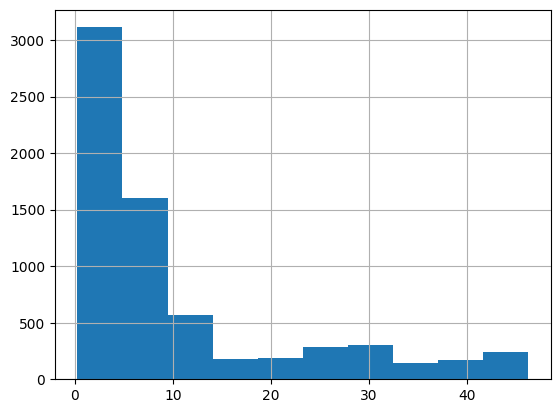

In [17]:
df1['Price'].hist()

Do vậy, thường Gom nhóm dữ liệu - Clustering: Kmeans ( cần chuẩn hoá dữ liệu)
Dữ liệu này có thể phân thành 3 khoảng: 0-10, 10-40, >40 kết hợp với các thuật toán khác để giải quyết ví dụ Kmeans...
khi phân thành 3 nhóm thì có thể thấy tác động lên từng nhóm cụ thể và rõ ràng hơn.


# Chuẩn hoá dữ liệu
Chuẩn hoá cột Price bảng df dùng cách Stander Scaler

<Axes: >

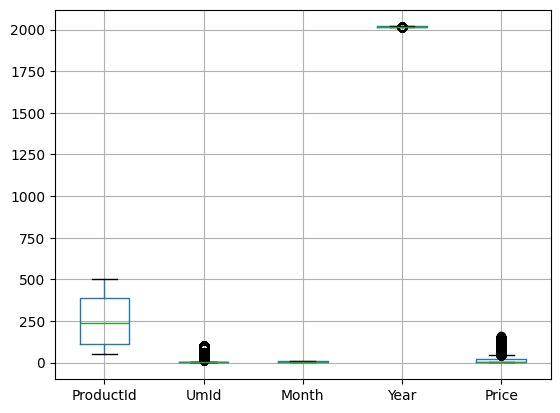

In [13]:
df.boxplot()

In [18]:
df([['Price']]).boxplot()

TypeError: 'DataFrame' object is not callable

In [20]:
# khai báo phương pháp
s_scaler = StandardScaler()

# áp phương pháp vào tập dữ liệu
df_s = s_scaler.fit_transform(df[['Price']])

# đưa lại về dạng bảng
# chỉ định tên cột
# colnames = list(df.columns)
df_s = pd.DataFrame(df_s, columns=['Price'])
df_s

,Price
0,-0.501710
1,-0.497847
2,-0.488572
3,-0.473084
4,-0.456302
...,...
7376,1.434877
7377,1.489015
7378,1.565614
7379,1.608608


In [19]:
# khai báo phương pháp
s_scaler = StandardScaler()

# áp phương pháp vào tập dữ liệu
df_s = s_scaler.fit_transform(df[['Price']])

# đưa lại về dạng bảng
# chỉ định tên cột
# colnames = list(df.columns)
df_s = pd.DataFrame(df_s, columns=['Giá'])
df_s

,Giá
0,-0.501710
1,-0.497847
2,-0.488572
3,-0.473084
4,-0.456302
...,...
7376,1.434877
7377,1.489015
7378,1.565614
7379,1.608608


In [21]:
# 'Price' --> tên của cột là Price
# df['Price'] --> cột Price thuộc bảng df


# Mã hoá DL rời rạc

In [19]:
# Mã hoá cột ProductName

df['ProductName']

0                 Rice - Retail
1                 Rice - Retail
2                 Rice - Retail
3                 Rice - Retail
4                 Rice - Retail
                 ...           
7376    Cocoa (powder) - Retail
7377    Cocoa (powder) - Retail
7378    Cocoa (powder) - Retail
7379    Cocoa (powder) - Retail
7380    Cocoa (powder) - Retail
Name: ProductName, Length: 7381, dtype: object

In [20]:
df['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [ ]:
# One hot Encoder ProductName

In [22]:
s = df['ProductName']
pd.get_dummies(s)

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Rời rạc hoá cột định lượng
Chia giá trị ở cột Price thành 5 phần có khoảng bằng nhau

In [29]:
a = pd.cut(df['Price'], 5, precision=0)
a

0        (0.1, 32.0]
1        (0.1, 32.0]
2        (0.1, 32.0]
3        (0.1, 32.0]
4        (0.1, 32.0]
            ...     
7376    (32.0, 64.0]
7377    (32.0, 64.0]
7378    (32.0, 64.0]
7379    (32.0, 64.0]
7380    (32.0, 64.0]
Name: Price, Length: 7381, dtype: category
Categories (5, interval[float64, right]): [(0.1, 32.0] < (32.0, 64.0] < (64.0, 96.0] < (96.0, 128.0] < (128.0, 159.0]]

In [30]:
pd.value_counts(a)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7244\2469683716.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(a)


Price
(0.1, 32.0]       6223
(32.0, 64.0]       867
(64.0, 96.0]       155
(96.0, 128.0]      105
(128.0, 159.0]      31
Name: count, dtype: int64

In [34]:
# Chia giá trị ở cột Price thành 5 phần có số lượng dữ liệu bằng nhau
b = pd.qcut(df['Price'], 5, precision=0)
b

0          (3.0, 5.0]
1          (3.0, 5.0]
2          (5.0, 8.0]
3          (5.0, 8.0]
4          (5.0, 8.0]
            ...      
7376    (28.0, 159.0]
7377    (28.0, 159.0]
7378    (28.0, 159.0]
7379    (28.0, 159.0]
7380    (28.0, 159.0]
Name: Price, Length: 7381, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 3.0] < (3.0, 5.0] < (5.0, 8.0] < (8.0, 28.0] < (28.0, 159.0]]

In [32]:
pd.value_counts(b)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7244\2343181299.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(b)


Price
(-1.0, 3.0]      1477
(3.0, 5.0]       1476
(5.0, 8.0]       1476
(8.0, 28.0]      1476
(28.0, 159.0]    1476
Name: count, dtype: int64

In [35]:
pd.Series(df['Price']).value_counts()

Price
0.4118     27
0.5375     24
0.4612     16
0.7102     12
2.4291     12
           ..
11.4373     1
11.3191     1
10.5360     1
10.2522     1
51.6071     1
Name: count, Length: 6596, dtype: int64

In [36]:
pd.Series(df['Price']).value_counts(b)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().